## Pandas

In [38]:
import pandas as pd
df = pd.read_csv('data.csv')

In [39]:
#Basic statistical description about the data
df.describe()

Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

In [40]:
# Checking if the data has null values
#df.isnull()
df.isnull().sum()


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [41]:
#Replacing the null values with the mean
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [42]:
# selected duration and calories column and aggregated the data using: min, max, count, mean
df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])

Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244

In [43]:
# 5 Filtering the dataframe to select the rows with calories values between 500 and 1000.
caloriey_filter = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
caloriey_filter

Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3

In [44]:
# 6 Filtering the dataframe to select the rows with calories values > 500 and pulse < 100
calory_pulse_filter = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
calory_pulse_filter


Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3

In [45]:
#7 Creating a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
# we set the axix 1 to represent the column
df_modified = df.drop('Maxpulse', axis=1)
df_modified

Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]

In [46]:
# 8 Deleting the “Maxpulse” column from the main df dataframe
df.drop('Maxpulse', axis=1, inplace=True)
print(df.head())

   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [48]:
# 9 Converting the datatype of Calories column to int datatype
df['Calories'] = df['Calories'].astype(int)
print(df.dtypes)
df.head()

Duration    int64
Pulse       int64
Calories    int64
dtype: object


Duration  Pulse  Calories
0        60    110       409
1        60    117       479
2        60    103       340
3        45    109       282
4        45    117       406

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


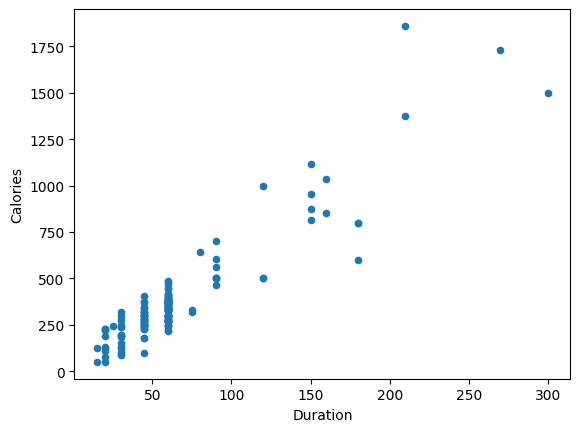

In [49]:
# 10 Using pandas creating a scatter plot for the two columns (Duration and Calories)
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Duration', y='Calories')
plt.show()

## TITANIC DATASET

In [ ]:
import pandas as pd  
import seaborn as sns 
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.5433513806577555

As this is negative we do not keep it

In [ ]:
matrix = df.corr()
matrix

PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.000000

<Axes: >

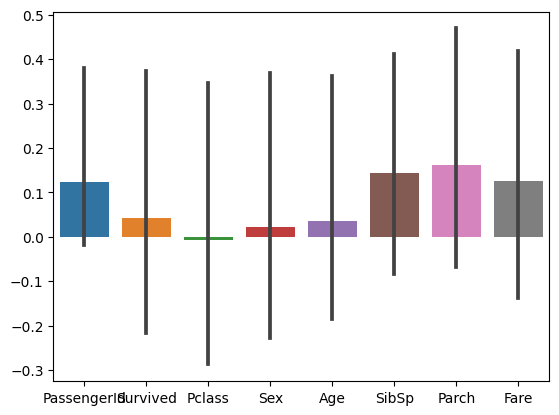

In [ ]:
sns.barplot(data=matrix) #BarPlot Visualization for above dataset

<Axes: ylabel='Count'>

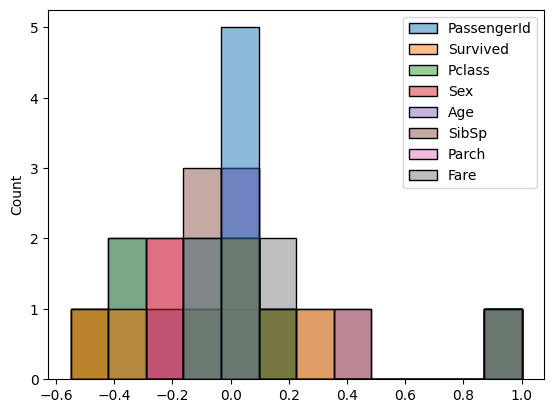

In [ ]:
sns.histplot(data=matrix) #Histogram Visualization for above dataset

**Implement Naïve Bayes method using scikit-learn library and report the accuracy.**

In [ ]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)

features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')


In [ ]:
# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values

train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
accuracy is 0.7552447552447552


## Glass Dataset

In [ ]:
glass=pd.read_csv("glass.csv") #importing glass dataset from given link

In [ ]:
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [ ]:
des=glass.corr()
glass.corr().style.background_gradient(cmap="Blues")

b. Use train_test_split to create training and testing part.

In [ ]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass[target],test_size=0.2, random_state=1)

In [ ]:
#Evaluate the model on testing part using score and classification_report(y_true, y_pred)
classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\naccuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]

accuracy is 0.8372093023255814


1. Implement linear SVM method using scikit library

In [ ]:
from sklearn.svm import SVC, LinearSVC
classifier = LinearSVC()

classifier.fit(X_train, Y_train)

LinearSVC()

In [ ]:
# Evaluate the model on testing part using score and classification_report(y_true, y_pred)
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\naccuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.48      0.92      0.63        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4

    accuracy                           0.67        43
   macro avg       0.25      0.31      0.27        43
weighted avg       0.58      0.67      0.61        43

[[18  1  0  0  0  0]
 [ 0 11  0  0  1  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  3  0  0  1  0]]

accuracy is 0.6744186046511628


<Axes: >

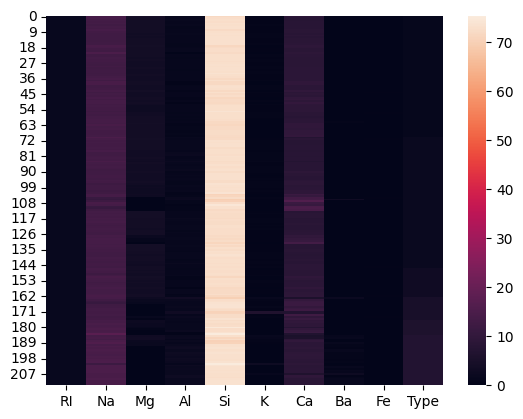

In [ ]:
sns.heatmap(data=glass) #HeatMap Visualization for above dataset


<Axes: >

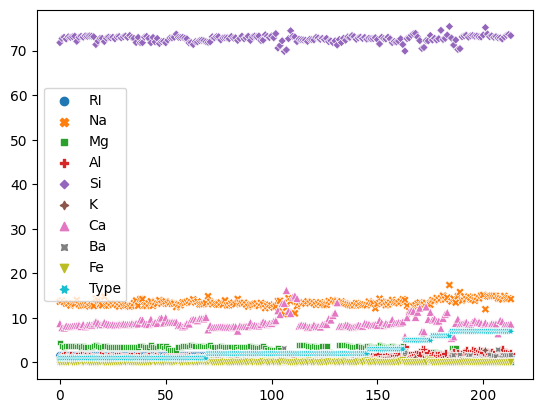

In [ ]:
sns.scatterplot(data=glass)  #ScatterPlot Visualization for above dataset

Naive Bayes method is best for data visualization than that of Support Vector Machine method when we compare the accuracy.
As accuracy is higher for naive bayes than SVM